<a href="https://colab.research.google.com/github/KarivetiKeerthi/Scaler-Projects/blob/main/Yulu_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import norm,binom,t,f_oneway,poisson

In [ ]:
!pip install numpy

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [ ]:
df.describe(include='object').T

count unique                  top freq
datetime  10886  10886  2011-01-01 00:00:00    1

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.isnull().sum()/len(df)*100

datetime      0.0
season        0.0
holiday       0.0
workingday    0.0
weather       0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
casual        0.0
registered    0.0
count         0.0
dtype: float64

In [ ]:
df.isna().sum().sum()

0

In [ ]:
unique_attributes = df.nunique()
unique_attributes

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df['season'].value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [ ]:
df['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [ ]:
df['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [ ]:
df['weather'].value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

<Axes: ylabel='season'>

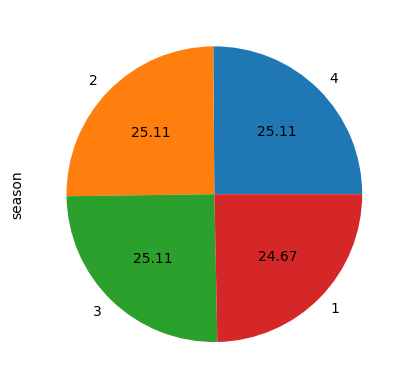

In [ ]:
df['season'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='holiday'>

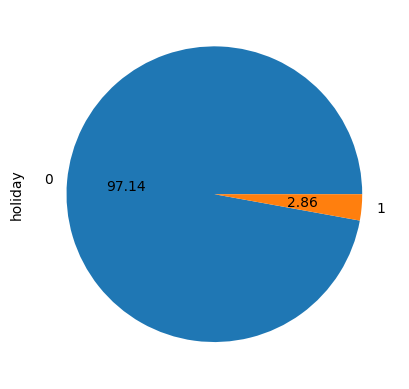

In [ ]:
df['holiday'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='workingday'>

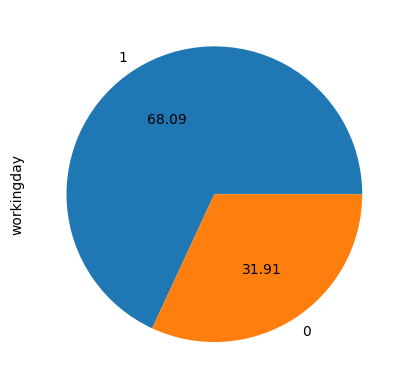

In [ ]:
df['workingday'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='weather'>

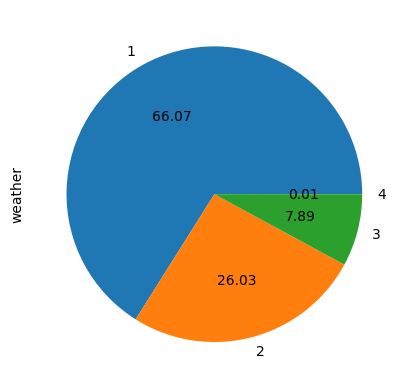

In [ ]:
df['weather'].value_counts().plot(kind='pie',autopct='%.2f')

In [ ]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [ ]:
df.tail()

datetime  season  holiday  workingday  weather   temp  \
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88

<ipython-input-16-c31e757c2d66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'],kde=False, color='green', bins=20)


<Axes: xlabel='temp'>

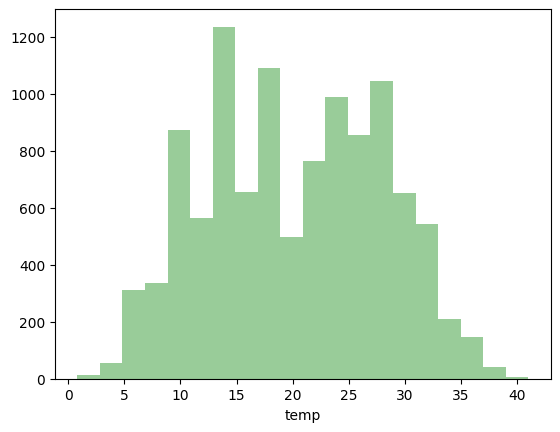

In [ ]:
sns.distplot(df['temp'],kde=False, color='green', bins=20)

<ipython-input-18-9fdb4186d88a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'],kde=False, color='red', bins=20)


<Axes: xlabel='atemp'>

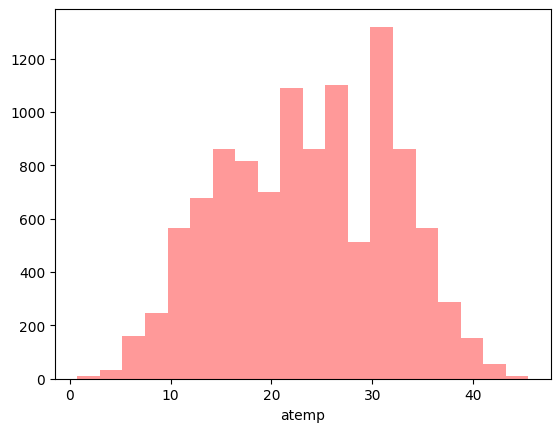

In [ ]:
sns.distplot(df['atemp'],kde=False, color='red', bins=20)

<ipython-input-19-91505d0da089>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['humidity'],kde=False, color='blue', bins=20)


<Axes: xlabel='humidity'>

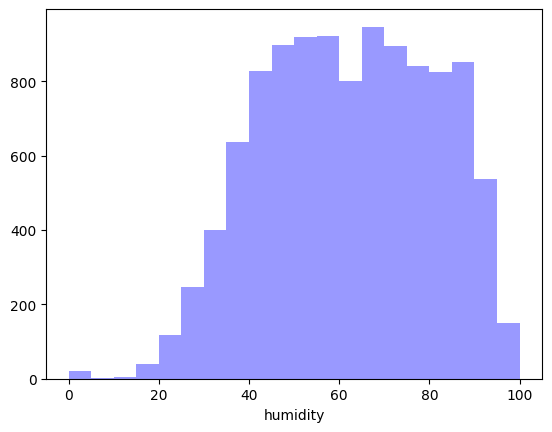

In [ ]:
sns.distplot(df['humidity'],kde=False, color='blue', bins=20)

<ipython-input-23-93aac841eeae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['windspeed'],kde=False, color='purple', bins=20)


<Axes: xlabel='windspeed'>

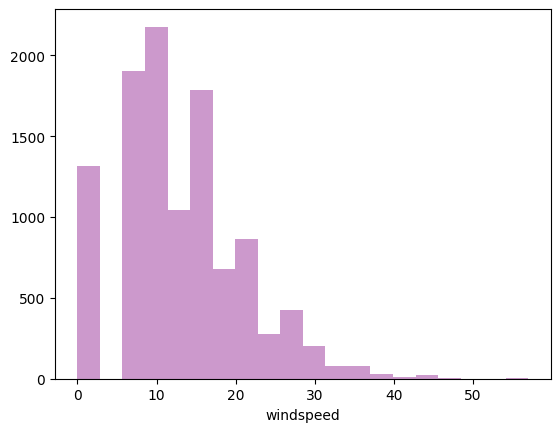

In [ ]:
sns.distplot(df['windspeed'],kde=False, color='purple', bins=20)

<ipython-input-25-7fa4336f1aa3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['casual'],kde=False, color='brown', bins=20)


<Axes: xlabel='casual'>

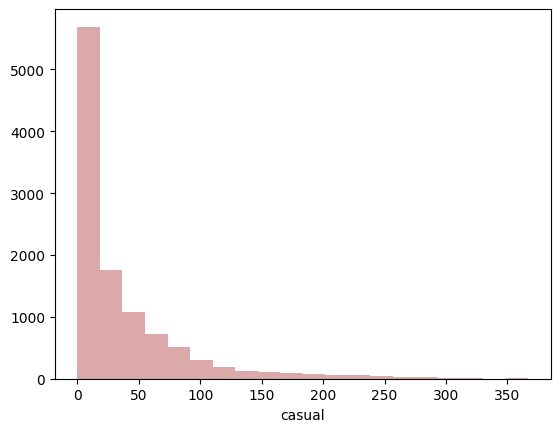

In [ ]:
sns.distplot(df['casual'],kde=False, color='brown', bins=20)

<ipython-input-26-dabe4775f285>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['registered'],kde=False, color='orange', bins=20)


<Axes: xlabel='registered'>

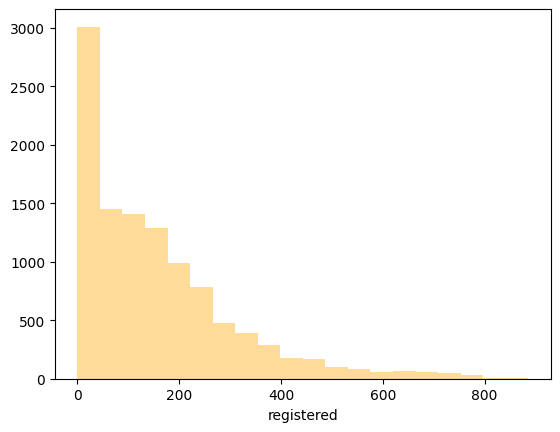

In [ ]:
sns.distplot(df['registered'],kde=False, color='orange', bins=20)

<ipython-input-29-e7beab73a729>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['count'],kde=False, color='darkblue', bins=20)


<Axes: xlabel='count'>

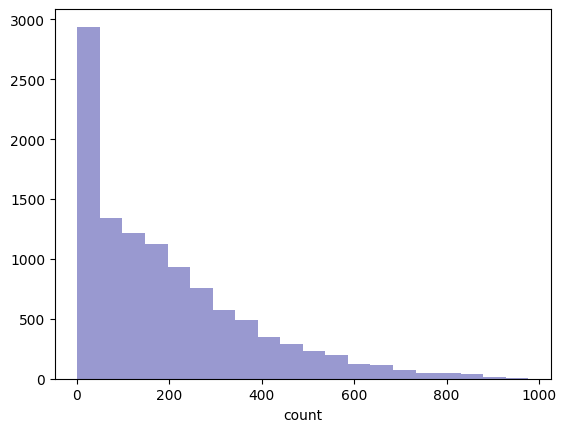

In [ ]:
sns.distplot(df['count'],kde=False, color='darkblue', bins=20)

Text(0.5, 1.0, 'Weather - Season Count Plot')

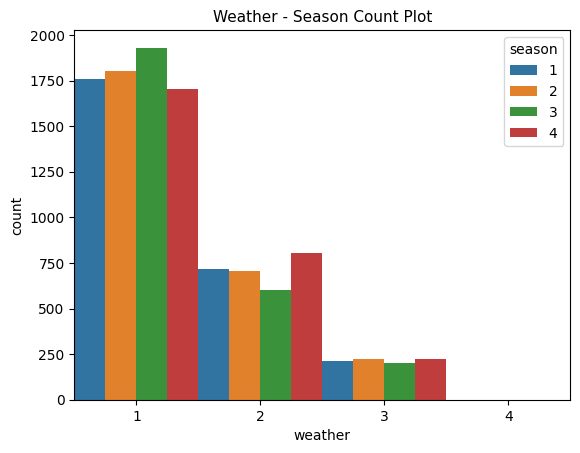

In [ ]:
sns.countplot(x='weather', hue='season', width=1, data=df)
plt.title('Weather - Season Count Plot', size= 11)

Text(0.5, 1.0, 'Season - Holiday Count Plot')

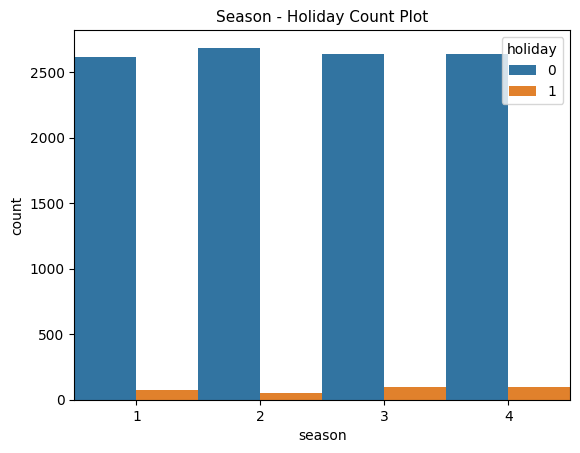

In [ ]:
sns.countplot(x='season', hue='holiday', width=1, data=df)
plt.title('Season - Holiday Count Plot', size= 11)

Text(0.5, 1.0, 'Season - workingday Count Plot')

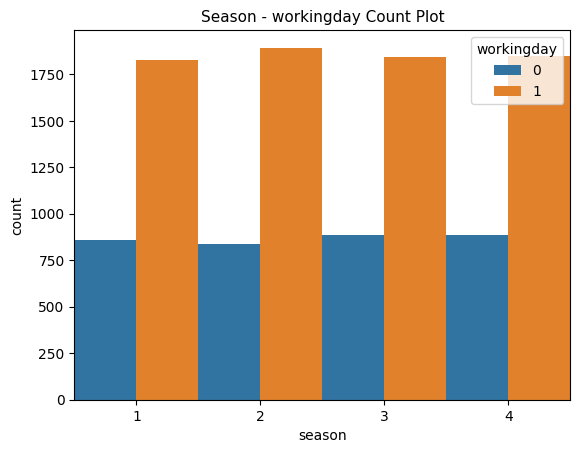

In [ ]:
sns.countplot(x='season', hue='workingday', width=1, data=df)
plt.title('Season - workingday Count Plot', size= 11)

Text(0.5, 1.0, 'Weather - workingday Count Plot')

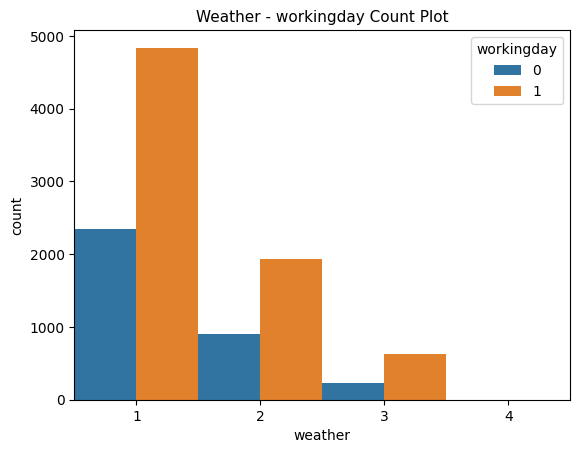

In [ ]:
sns.countplot(x='weather', hue='workingday', width=1, data=df)
plt.title('Weather - workingday Count Plot', size= 11)

Text(0.5, 1.0, 'Weather - Holiday Count Plot')

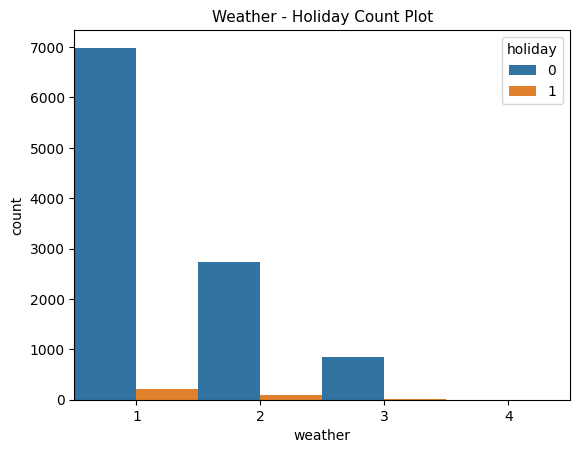

In [ ]:
sns.countplot(x='weather', hue='holiday', width=1, data=df)
plt.title('Weather - Holiday Count Plot', size= 11)

Text(0.5, 1.0, 'Registered- Season HistPlot')

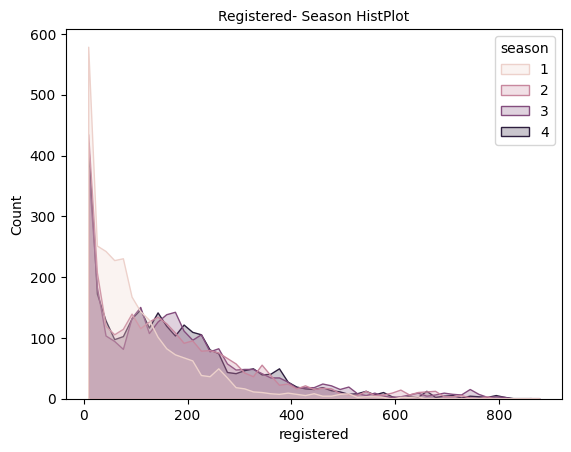

In [ ]:
sns.histplot(data = df,x ='registered',hue = 'season',element='poly')
plt.title('Registered- Season HistPlot', size= 10)

Text(0.5, 1.0, 'Casual - Season HistPlot')

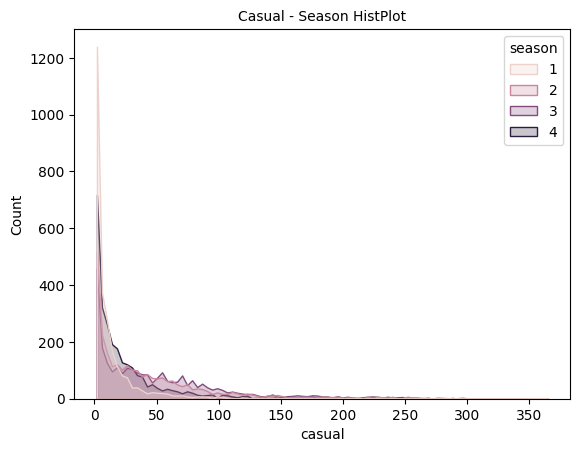

In [ ]:
sns.histplot(data = df,x ='casual',hue = 'season',element='poly')
plt.title('Casual - Season HistPlot', size= 10)

Text(0.5, 1.0, 'Windspeed-Weather HistPlot')

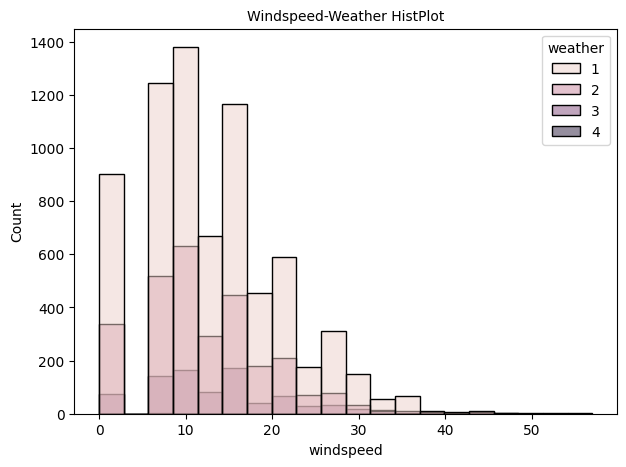

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data = df,x = 'windspeed',hue = 'weather',bins=20)
plt.title('Windspeed-Weather HistPlot', size= 10)

Text(0.5, 1.0, 'Windspeed-Season HistPlot')

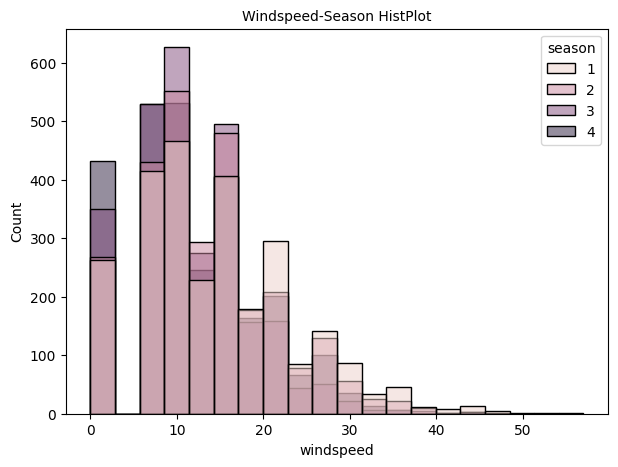

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data = df,x = 'windspeed',hue = 'season',bins=20)
plt.title('Windspeed-Season HistPlot', size= 10)

Text(0.5, 1.0, 'Season-Count BoxPlot')

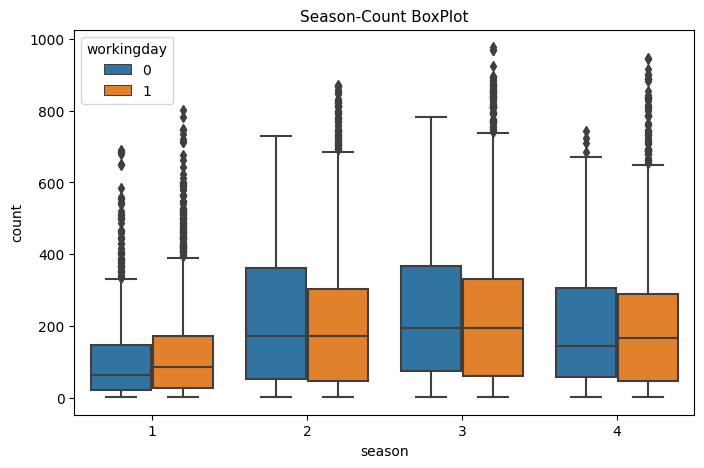

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'season', y = 'count', hue='workingday')
plt.title('Season-Count BoxPlot', size= 11)

Text(0.5, 1.0, 'Season-Count BoxPlot')

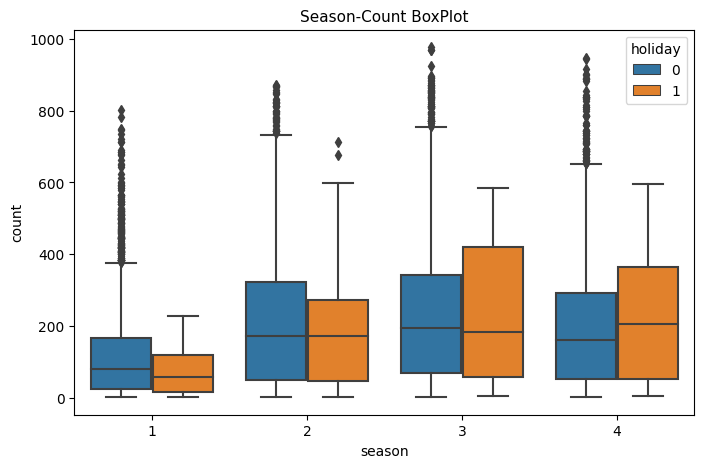

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'season', y = 'count', hue='holiday')
plt.title('Season-Count BoxPlot', size= 11)

Text(0.5, 1.0, 'Weather-Count BoxPlot')

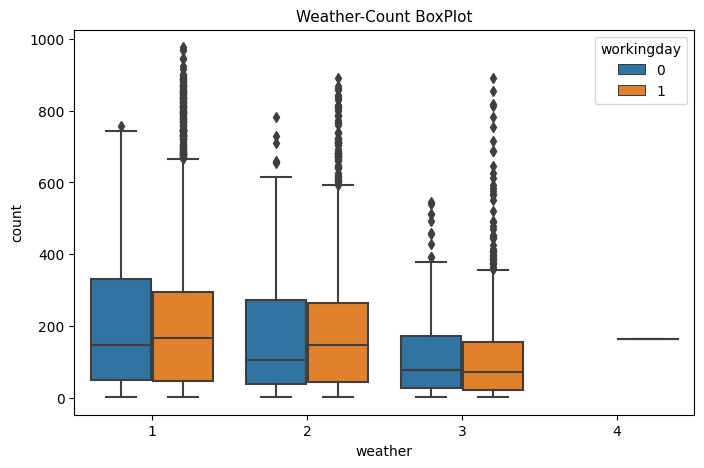

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'weather', y = 'count', hue='workingday')
plt.title('Weather-Count BoxPlot', size= 11)

Text(0.5, 1.0, 'Weather-Temp BoxPlot')

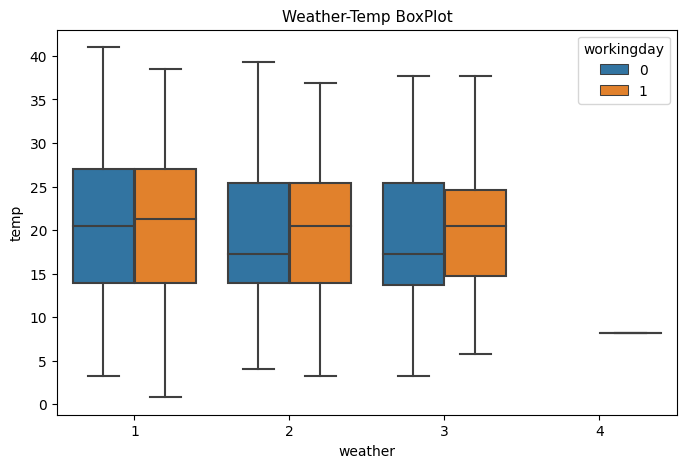

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'weather', y = 'temp', hue='workingday')
plt.title('Weather-Temp BoxPlot', size= 11)

Text(0.5, 1.0, 'Season-Temperature BoxPlot')

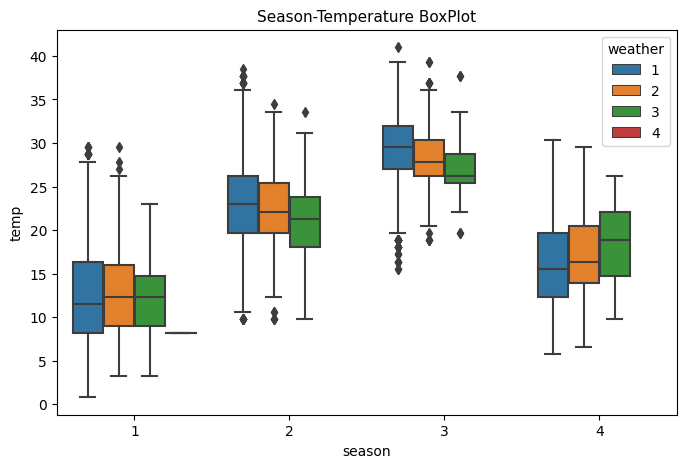

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'season', y = 'temp', hue='weather')
plt.title('Season-Temperature BoxPlot', size= 11)

Text(0.5, 1.0, 'Season-Atemp BoxPlot')

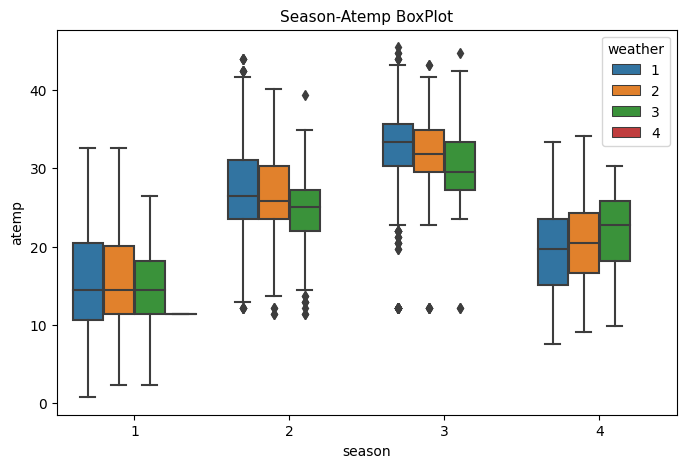

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x = 'season', y = 'atemp', hue='weather')
plt.title('Season-Atemp BoxPlot', size= 11)

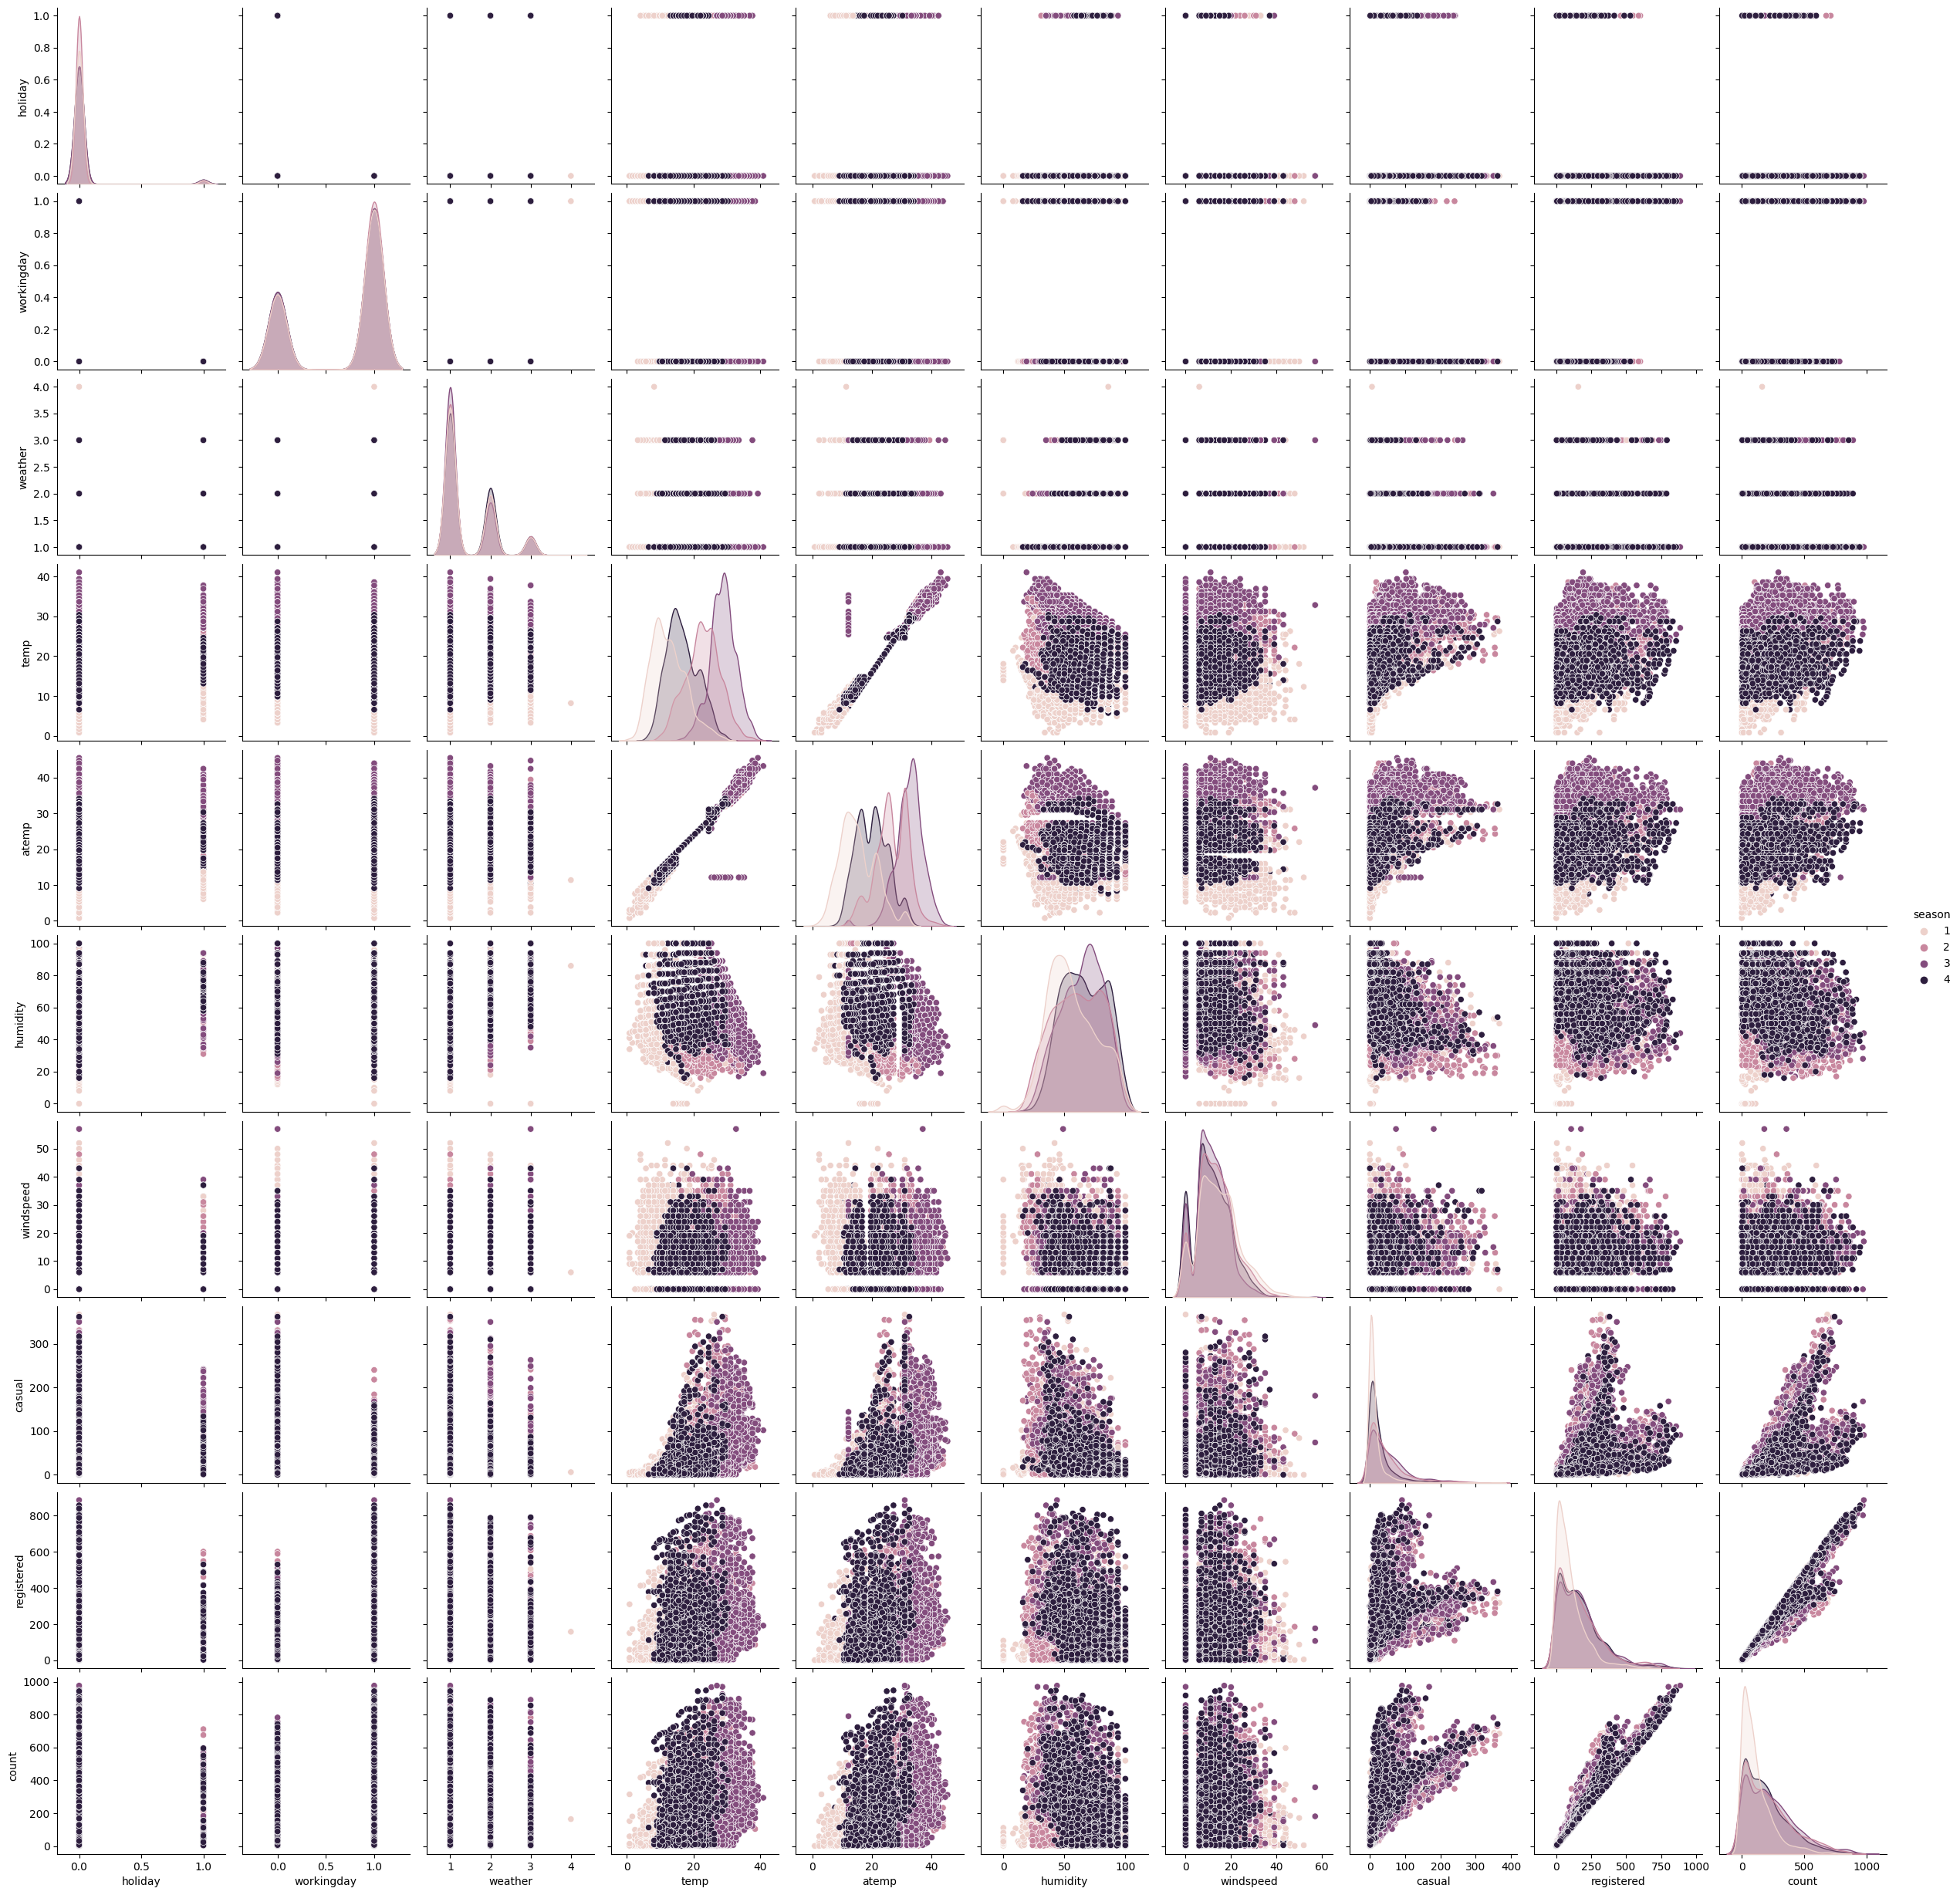

In [ ]:
sns.pairplot(data=df,hue='season')

<ipython-input-22-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

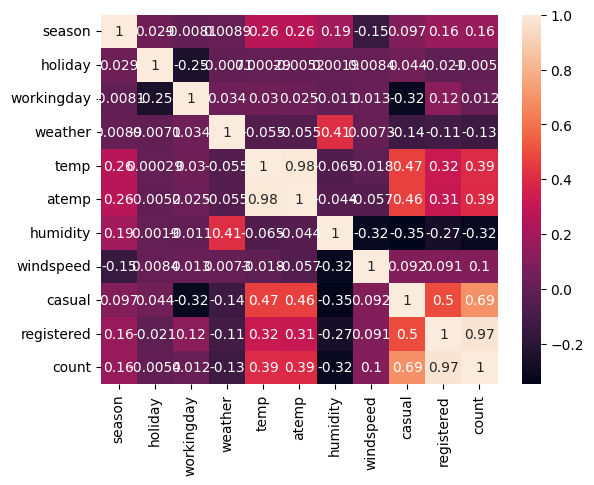

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='Count'>

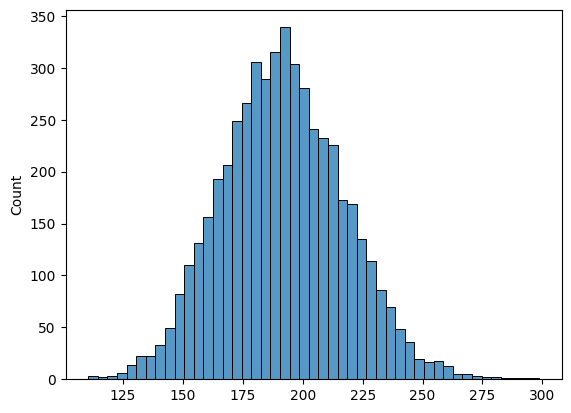

In [ ]:
count_sample_50=[np.mean(df['count'].sample(50)) for i in range(5000)]
sns.histplot(count_sample_50)

<Axes: ylabel='Count'>

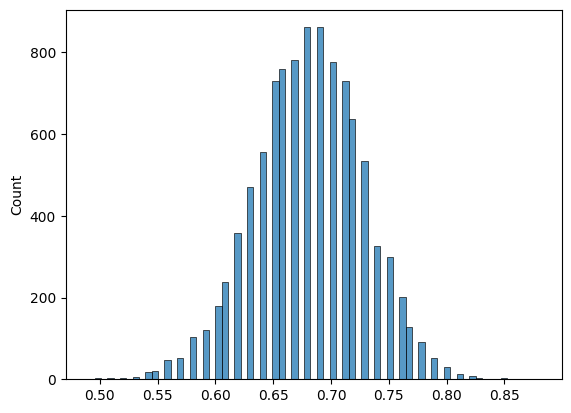

In [ ]:
workingday_sample_100=[np.mean(df['workingday'].sample(100)) for i in range(10000)]
sns.histplot(workingday_sample_100)

<Axes: ylabel='Count'>

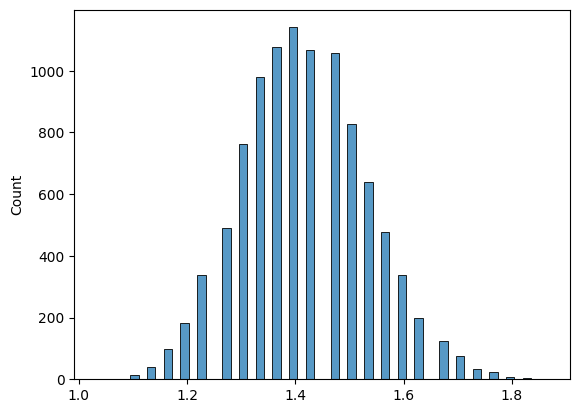

In [ ]:
weather_sample_30=[np.mean(df['weather'].sample(30)) for i in range(10000)]
sns.histplot(weather_sample_30)

<Axes: ylabel='Count'>

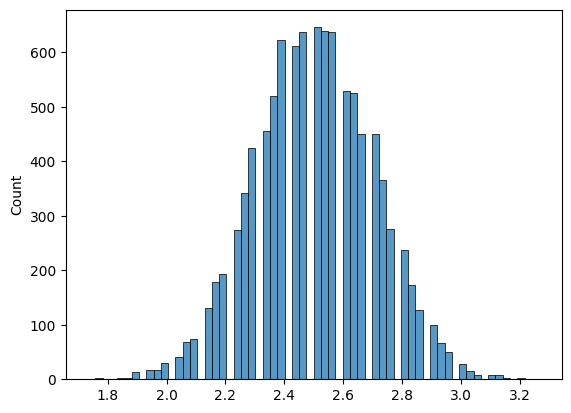

In [ ]:
season_sample_30=[np.mean(df['season'].sample(30)) for i in range(10000)]
sns.histplot(season_sample_30)

In [ ]:
registered_sample_30=[np.mean(df['registered'].sample(30)) for i in range(5000)]
sns.histplot(registered_sample_30)

In [ ]:
df_nonworkingday = df[df["workingday"]==0]['count'].values
df_nonworkingday

array([ 16,  40,  32, ..., 106,  89,  33])

In [ ]:
df_workingday = df[df["workingday"]==1]['count'].values
df_workingday

array([  5,   2,   1, ..., 168, 129,  88])

In [ ]:
t_stat,p_value = ttest_ind(df_workingday,df_nonworkingday,alternative='two-sided')
alpha =0.05
print("t_stat : ",t_stat)
print("p_value : ",p_value)
if p_value < alpha :
  print("Reject Ho :", "Working Day has an effect on the number of electric cycles rented")
else :
  print("Fail to Reject Ho :" , "Working Day has no effect on the number of electric cycles rented")

t_stat :  1.2096277376026694
p_value :  0.22644804226361348
Fail to Reject Ho : Working Day has no effect on the number of electric cycles rented


In [ ]:
df_chi2table = pd.crosstab(df['season'],df['weather'])
df_chi2table

weather     1    2    3  4
season                    
1        1759  715  211  1
2        1801  708  224  0
3        1930  604  199  0
4        1702  807  225  0

In [ ]:
test_statistic, p_value, dof, expected_values = chi2_contingency(df_chi2table)
print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05
if(p_value < alpha):
  print("Reject Ho :","Weather is dependent on the season")
else:
  print("Fail to reject Ho :" , "Weather is not dependent on the season ")

Test statistic: 49.158655596893624
p-value: 1.549925073686492e-07
Reject Ho : Weather is dependent on the season


<Axes: xlabel='season', ylabel='count'>

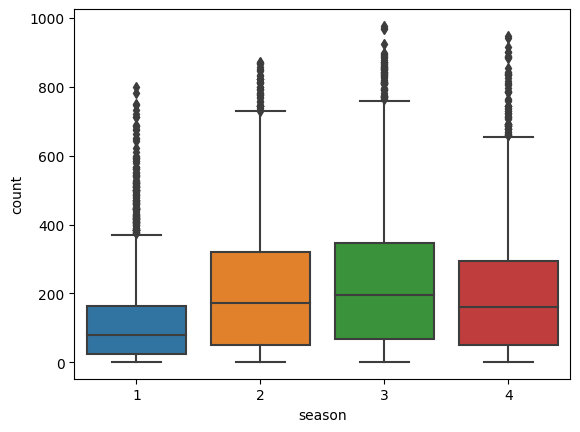

In [ ]:
sns.boxplot(x=df["season"],y=df["count"])

<Axes: xlabel='weather', ylabel='count'>

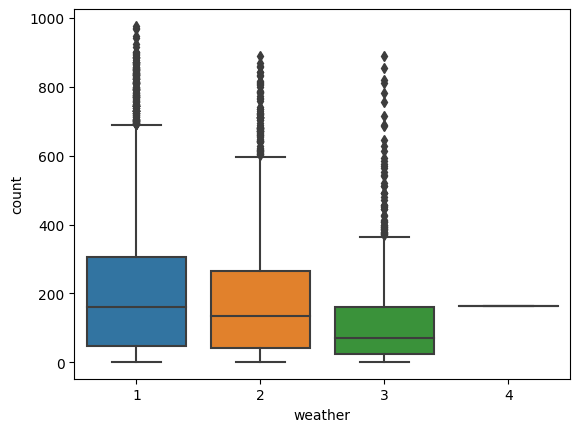

In [ ]:
sns.boxplot(x=df["weather"],y=df["count"])

<Axes: xlabel='workingday', ylabel='count'>

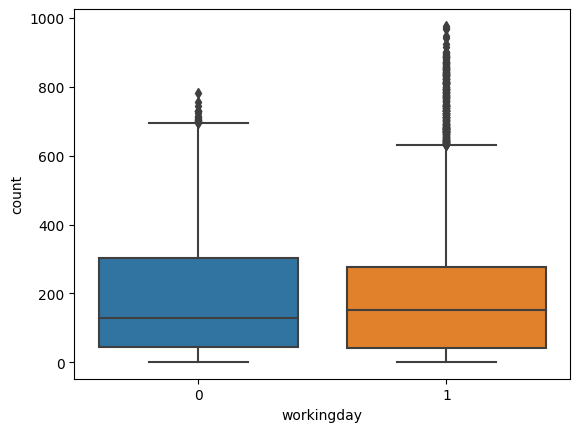

In [ ]:
sns.boxplot(x=df["workingday"],y=df["count"])

<Axes: xlabel='holiday', ylabel='count'>

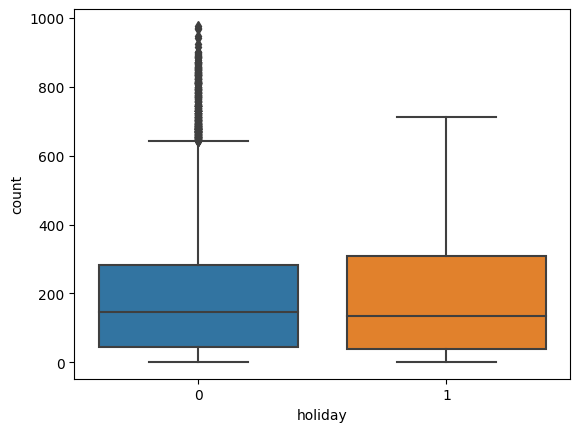

In [ ]:
sns.boxplot(x=df["holiday"],y=df["count"])

In [ ]:
count_weather_1 = df[df["weather"]=="1"]['count']
count_weather_2 = df[df["weather"]=="2"]['count']
count_weather_3 = df[df["weather"]=="3"]['count']
count_weather_4 = df[df["weather"]=="4"]['count']

<Axes: xlabel='count', ylabel='Count'>

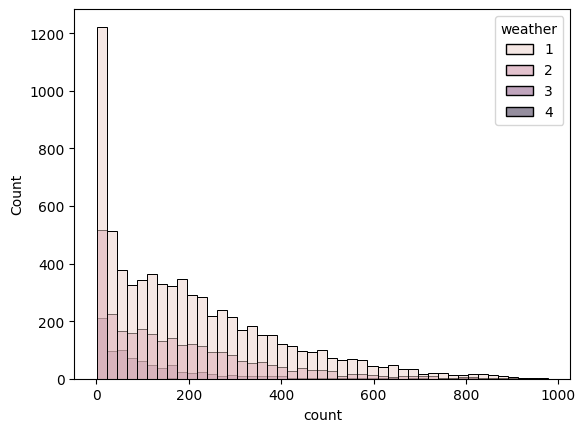

In [ ]:
sns.histplot(data=df, x="count", hue="weather")

In [ ]:
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot

In [ ]:
df["random_group"]=np.random.choice(["g1","g2","g3","g4"],size=len(df))
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count random_group  
0      14.395        81     0.0000       3          13     16           g1  
1      13.635        80     0.0000       8          32     40           g4  
2      13.635        80     0.0000       5          27     32           g4  
3      14.395        75     0.0000       3          10     13           g1  
4      14.395        75     0.0000       0           1      1           g3  
...       ...       ...        ...     ...         ...    ...          ...  
10881  19.695        50    26.0027       7         329    336           g4  
10882  17.425        57    15.0013      10         231    241           g2  
10883  15.910        61    15.0013       4         164    168           g4  
10884  17.425        61     6.0032      12         117    129           g1  
10885  16.665        66     8.9981       4          84     88           g4  

[10886 rows x 13 columns]

<Axes: xlabel='random_group', ylabel='count'>

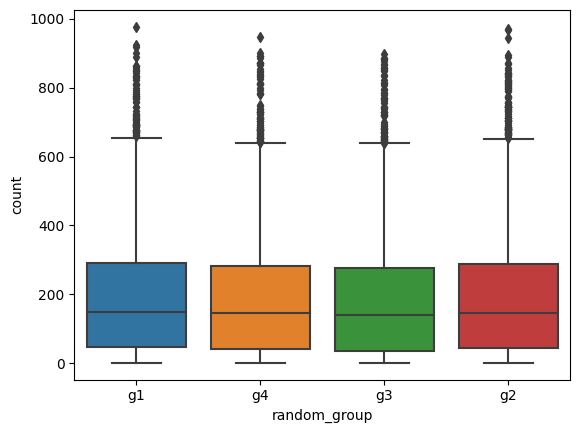

In [ ]:
sns.boxplot(x="random_group",y="count",data=df)

In [ ]:
count_g1 = df[df["random_group"]=="g1"]["count"]
count_g2 = df[df["random_group"]=="g2"]["count"]
count_g3 = df[df["random_group"]=="g3"]["count"]
count_g4 = df[df["random_group"]=="g4"]["count"]

<Axes: xlabel='count', ylabel='Count'>

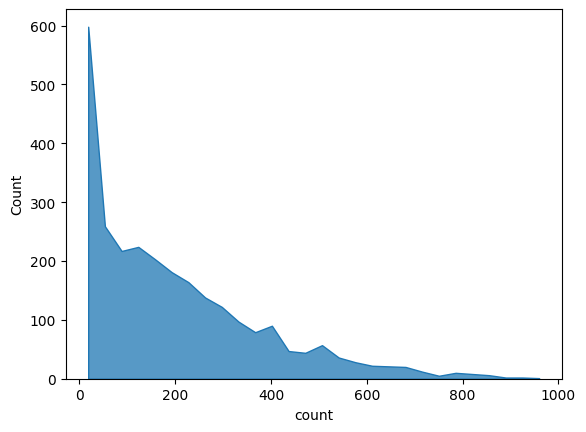

In [ ]:
sns.histplot(data = count_g1,element='poly')



<Axes: xlabel='count', ylabel='Count'>

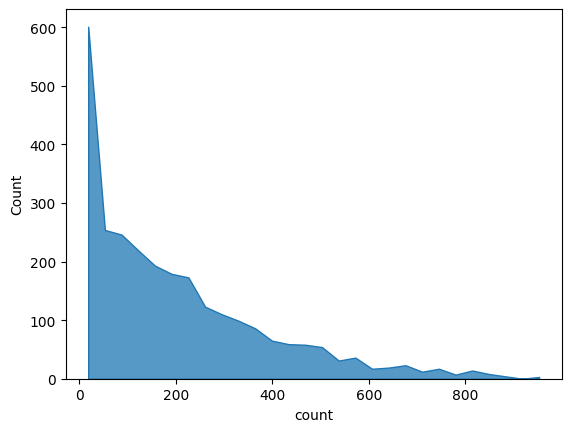

In [ ]:
sns.histplot(data = count_g2,element='poly')

<Axes: xlabel='count', ylabel='Count'>

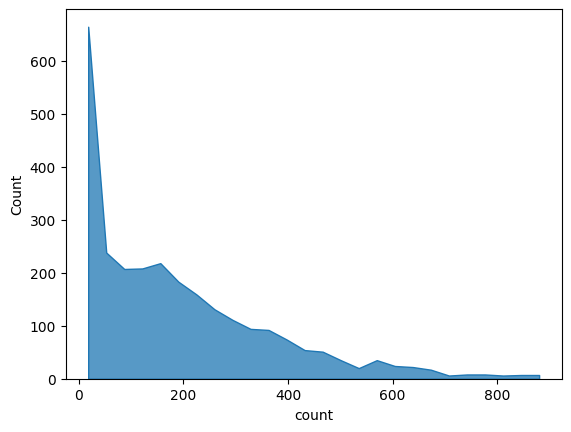

In [ ]:
sns.histplot(data = count_g3,element='poly')

<Axes: xlabel='count', ylabel='Count'>

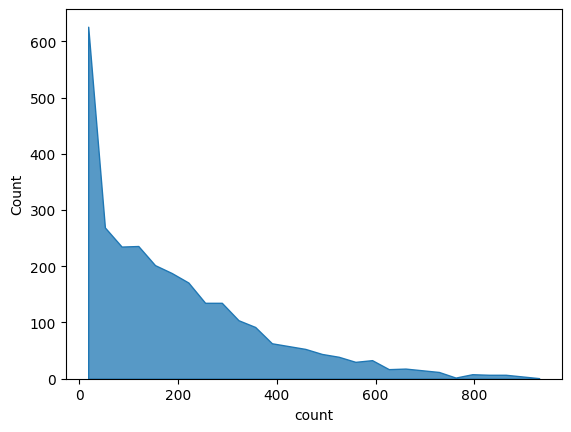

In [ ]:
sns.histplot(data = count_g4,element='poly')

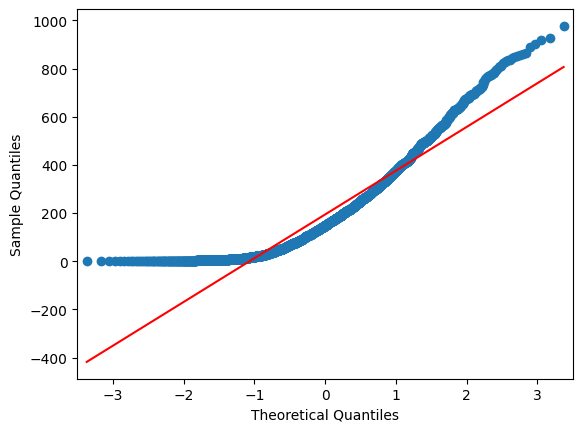

In [ ]:
qqplot(count_g1,line="s")
plt.show()

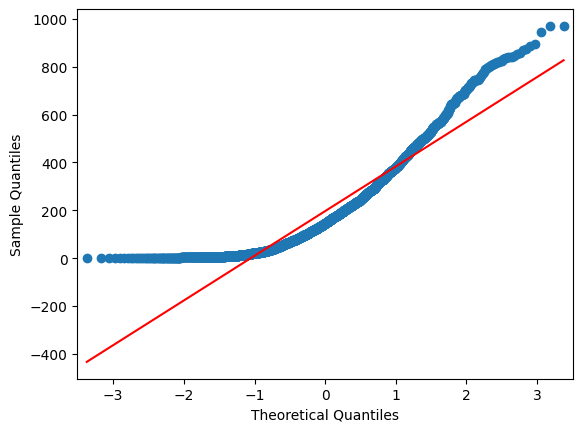

In [ ]:
qqplot(count_g2,line="s")
plt.show()

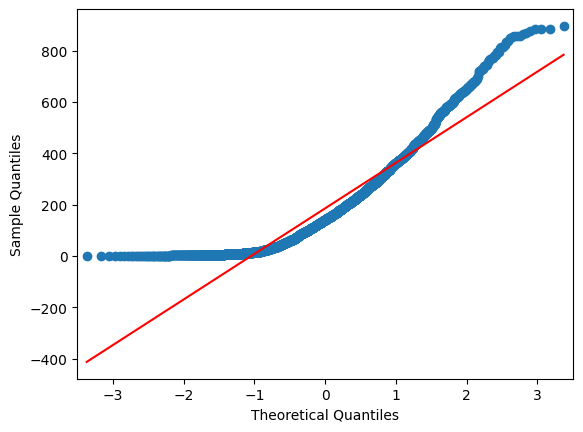

In [ ]:
qqplot(count_g3,line="s")
plt.show()

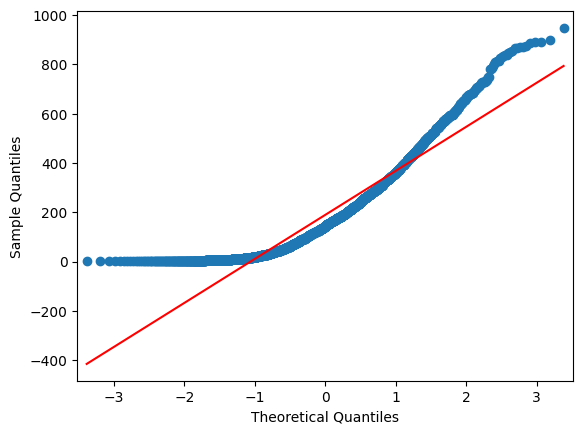

In [ ]:
qqplot(count_g4,line="s")
plt.show()

In [ ]:
x_stat,p_value=levene(count_g1,count_g2,count_g3,count_g4)
print("x_stat : ",x_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variances are NOT Equal")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variances are Equal")

x_stat :  1.3864452189517955
p_value :  0.24482620615058048
Interpretation : Fail to Reject Ho
Conclusion : Variances are Equal


In [ ]:
x_stat,p_value=shapiro(count_g1)
print("x_stat : ",x_stat)
print("p_value : ",p_value)
alpha = 0.05
if p_value< alpha:
  print("Interpretation : Reject Ho")
  print("Conclusion : Variances are NOT Equal")
else:
  print("Interpretation : Fail to Reject Ho")
  print("Conclusion : Variances are Equal")

x_stat :  0.8837950229644775
p_value :  5.281213652347371e-41
Interpretation : Reject Ho
Conclusion : Variances are NOT Equal
